In [ ]:
%matplotlib inline

import pickle
from transformers import AutoTokenizer, AutoModelForCausalLM

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
from IPython.display import clear_output
from collections import Counter
os.chdir("../")

from src import utils
from src.utils import optimal_tokenization
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.ticker import LogLocator


t_val = 2.132 # t-value for 90% confidence interval and 5 d.o.f


In [4]:
#Custom class for log locator to filter ticks
class CustomLogLocator(LogLocator):
    def __init__(self, base=10.0, subs=None, numticks=10, threshold=0.2):
        super().__init__(base=base, subs=subs, numticks=numticks)
        self.threshold = threshold

    def tick_values(self, vmin, vmax):
        ticks = super().tick_values(vmin, vmax)
        # Filter ticks greater than the threshold
        return [tick for tick in ticks if tick > self.threshold]

# Plot the probability that the split token sequence is plausible

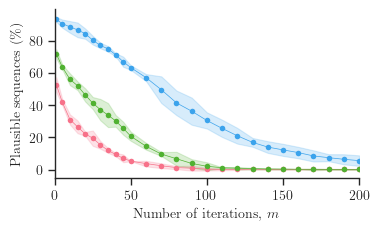

In [ ]:
#Load pickle
with open("outputs/heuristic/L1B/heuristic_model_Llama-3.2-1B-Instruct_T_1.45_p_0.9_k_None_prompt_idare you .pkl", "rb") as f:
    data_09 = pickle.load(f)

with open("outputs/heuristic/L1B/heuristic_model_Llama-3.2-1B-Instruct_T_1.45_p_0.95_k_None_prompt_idare you .pkl", "rb") as f:
    data_095 = pickle.load(f)
    
with open("outputs/heuristic/L1B/heuristic_model_Llama-3.2-1B-Instruct_T_1.45_p_0.99_k_None_prompt_idare you .pkl", "rb") as f:
    data_099 = pickle.load(f)

#Define the splits used to generated the data, i.e. the number of iterations in the heuristic
splits = [1,5,10, 15, 20 ,25 ,30 ,35, 40 ,45 ,50, 60,70,80,90,100, 110,  120, 130,  140,  150,  160,  170, 180 ,190, 200]

percentage_09 = [ [] for i in range(len((data_099["top_p_count"]))) ]
percentage_095 = [ [] for i in range(len((data_099["top_p_count"]))) ]
percentage_099 = [ [] for i in range(len((data_099["top_p_count"]))) ]


#Compute the percentage of plausible sequences for each top-p value, and for each realization of the sequences, indexed by "seq_idx" 

for seq_idx in range(len((data_099["top_p_count"]))):
    percentage_09.append( np.array( [ data_09["top_p_count"][seq_idx][i]  * splits[i]/ sum(data_09["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_095.append( np.array( [ data_095["top_p_count"][seq_idx][i]  * splits[i]/ sum(data_095["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_099.append( np.array( [ data_099["top_p_count"][seq_idx][i]  * splits[i] / sum(data_099["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )







mean_09 = np.mean( np.stack(percentage_09,axis=0) , axis=0)
std_09 = np.std( np.stack(percentage_09,axis=0) , axis=0)

mean_095 = np.mean( np.stack(percentage_095,axis=0) , axis=0)
std_095 = np.std( np.stack(percentage_095,axis=0) , axis=0)

mean_099 = np.mean( np.stack(percentage_099,axis=0) , axis=0)
std_099 = np.std( np.stack(percentage_099,axis=0) , axis=0)



splits_new = np.array(splits)
mean_09_new = np.array(mean_09)
mean_095_new = np.array(mean_095)
mean_099_new = np.array(mean_099)
std_09_new = np.array(std_09)
std_095_new = np.array(std_095)
std_099_new = np.array(std_099)


df = pd.DataFrame({
    'mean_percent':np.concatenate( (mean_09, mean_095, mean_099) ),
    'top-p': ['085'] * len(mean_09) + ['09'] * len(mean_095) + ['095'] * len(mean_099),
    'splits' : np.concatenate( (splits, splits, splits) ), 
})


sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX

fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))


sns.lineplot(data=df, x="splits", y='mean_percent', hue='top-p', palette=palette, ax=ax, linewidth=0.5, markersize=4,marker="o", err_style= "band", linestyle="-", markeredgewidth=0)


ax.fill_between(splits, mean_09-std_09 * t_val, mean_09+std_09 * t_val, color=palette[0], alpha=0.2)

ax.fill_between(splits, mean_095-std_095 * t_val, mean_095+std_095 * t_val, color=palette[1], alpha=0.2)

ax.fill_between(splits, mean_099-std_099 * t_val, mean_099+std_099 * t_val, color=palette[2], alpha=0.2)


sns.despine(ax=ax)
ax.set_xlabel(r"Number of iterations, $m$")
ax.set_ylabel(r"Plausible sequences (\%)")

plt.legend().set_visible(False)

ax.set_xlim(0,200)


fig.tight_layout()
plt.show()



# Plot the total overcharge %

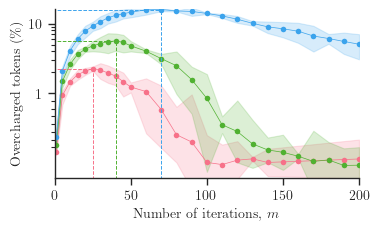

70 15.913906482390217
40 5.632332653621815
25 2.2595836747161315


In [ ]:

#Load the LMSYS-generated data using the src/heuristic_misreporting.py script
#Load the pkl or json files. Since pkl files save the generated tensors, their size is >100MB and we do not include them in this code. We include the json files instead, which are smaller but contain the same generated data.

#Load pickle
with open("outputs/heuristic/L1B/heuristic_model_Llama-3.2-1B-Instruct_T_1.45_p_0.9_k_None_prompt_idare you .pkl", "rb") as f:
    data_09 = pickle.load(f)

with open("outputs/heuristic/L1B/heuristic_model_Llama-3.2-1B-Instruct_T_1.45_p_0.95_k_None_prompt_idare you .pkl", "rb") as f:
    data_095 = pickle.load(f)
    
with open("outputs/heuristic/L1B/heuristic_model_Llama-3.2-1B-Instruct_T_1.45_p_0.99_k_None_prompt_idare you .pkl", "rb") as f:
    data_099 = pickle.load(f)


#Define the splits used to generated the data
splits = [1, 5, 10, 15, 20 ,25 ,30 ,35, 40 ,45 ,50, 60, 70, 80, 90, 100, 110,  120, 130,  140,  150,  160, 170, 180 ,190, 200]


percentage_09 = [ [] for i in range(len((data_099["top_p_count"]))) ]
percentage_095 = [ [] for i in range(len((data_099["top_p_count"]))) ]
percentage_099 = [ [] for i in range(len((data_099["top_p_count"]))) ]


#Compute the percentage of plausible sequences for each top-p value, and for each realization of the sequences, indexed by "seq_idx" 
for seq_idx in range(len((data_099["top_p_count"]))):
    percentage_09.append( np.array( [ data_09["top_p_count"][seq_idx][i]  * splits[i]/ sum(data_09["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_095.append( np.array( [ data_095["top_p_count"][seq_idx][i]  * splits[i]/ sum(data_095["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )
    percentage_099.append( np.array( [ data_099["top_p_count"][seq_idx][i]  * splits[i] / sum(data_099["generated_outputs"][seq_idx]) * 100  for i in range( len(splits))] ) )





mean_09 = np.mean( np.stack(percentage_09,axis=0) , axis=0)
std_09 = np.std( np.stack(percentage_09,axis=0) , axis=0)

mean_095 = np.mean( np.stack(percentage_095,axis=0) , axis=0)
std_095 = np.std( np.stack(percentage_095,axis=0) , axis=0)

mean_099 = np.mean( np.stack(percentage_099,axis=0) , axis=0)
std_099 = np.std( np.stack(percentage_099,axis=0) , axis=0)


splits = np.array(splits)
mean_09 = np.array(mean_09)
mean_095 = np.array(mean_095)
mean_099 = np.array(mean_099)
std_09 = np.array(std_09)
std_095 = np.array(std_095)
std_099 = np.array(std_099)


df = pd.DataFrame({
    'mean_percent':np.concatenate( (mean_09, mean_095, mean_099) ),
    'top-p': ['085'] * len(mean_09) + ['09'] * len(mean_095) + ['095'] * len(mean_099),
    'splits' : np.concatenate( (splits, splits, splits) ), 
})


sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 3)

utils.latexify() # Computer Modern, with TeX



fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))


sns.lineplot(data=df, x="splits", y='mean_percent', hue='top-p', palette=palette, ax=ax, linewidth=0.5, markersize=4,marker="o", err_style= "band", linestyle="-", markeredgewidth=0)


ax.fill_between(splits, mean_09-std_09 * t_val, mean_09+std_09 * t_val, color=palette[0], alpha=0.2)

ax.fill_between(splits, mean_095-std_095 * t_val, mean_095+std_095 * t_val, color=palette[1], alpha=0.2)

ax.fill_between(splits, mean_099-std_099 * t_val, mean_099+std_099 * t_val, color=palette[2], alpha=0.2)



#Plot the maximum of each curve
x_max_099 = splits[np.argmax(mean_099) ]      # x-coordinate at the maximum
y_max_099 = mean_099[ np.argmax(mean_099)]      # Maximum y value

x_max_09 = splits[np.argmax(mean_09) ]      # x-coordinate at the maximum
y_max_09 = mean_09[ np.argmax(mean_09)]      # Maximum y value


x_max_095 = splits[np.argmax(mean_095) ]      # x-coordinate at the maximum
y_max_095 = mean_095[ np.argmax(mean_095)]      # Maximum y value



ax.plot( [ -2, x_max_099], [y_max_099, y_max_099] , color=palette[2], linestyle='--',linewidth=0.7)
ax.plot([x_max_099, x_max_099], [-2, y_max_099], color=palette[2], linestyle='--', linewidth=0.7)

ax.plot( [ -2, x_max_09], [y_max_09, y_max_09] , color=palette[0], linestyle='--',linewidth=0.7)
ax.plot([x_max_09, x_max_09], [-2, y_max_09], color=palette[0], linestyle='--', linewidth=0.7)

ax.plot( [ -2, x_max_095], [y_max_095, y_max_095] , color=palette[1], linestyle='--',linewidth=0.7)
ax.plot([x_max_095, x_max_095], [-2, y_max_095], color=palette[1], linestyle='--', linewidth=0.7)


sns.despine(ax=ax)
ax.set_xlabel(r"Number of iterations, $m$")
ax.set_ylabel(r"Overcharged tokens (\%)")

plt.legend().set_visible(False)

ax.set_yscale("symlog", linthresh=1)

ax.set_ylim(-0.1,16)
ax.set_xlim(0,200)


ax.yaxis.set_major_locator(LogLocator(base=10.0, subs=None, numticks=10))  # Major ticks
ax.yaxis.set_minor_locator(CustomLogLocator(base=10.0, subs=[2, 3, 4, 5, 6, 7, 8, 9], numticks=10, threshold=0.2))  # Custom minor ticks


ax.set_yticks([1,10], [1,10] )

fig.tight_layout()
plt.show()
print(x_max_099, y_max_099)
print(x_max_095, y_max_095)
print(x_max_09, y_max_09)
